## Machine Learning Project

**o What are the most important features for predicting X as a target variable?**

**o Which classification approach do you prefer for the prediction of X as a target variable, and why?**

**o How to classify the loyal and churn customers using Support Vector Machines?**

**o Why is dimensionality reduction important in machine learning?**




**a) Logical justification based on the reasoning for the specific choice of machine learning approaches.**

**b) Multiple machine learning approaches (at least two) using hyperparameters and a comparison between the chosen modelling approaches.**

**c) Visualise your comparison of ML modelling outcomes. You may use a statistical approach to argue that one feature is more important than other features (for example, using PCA).**

**d) Cross-validation methods should be used to justify the authenticity of your ML results.**




**1. Motivation, a description of the problem domain, and an explanation of how the project's goals are justified using Prediction /Classification / Clustering Rules / Dimensionality Reduction etc.. (10 marks)**

**2. Characterization of data, explanation and description of techniques used for the variation in the accuracy across three training splits (10% / 20%/ 30%) using cross validation techniques. (30 marks)**

**3. Interpret and explain the results obtained, discuss overfitting / underfitting / generalisation, provide a rationale for the chosen model and use visualisations to support your findings. Comments in Python code, conclusions of the project should be specified at the end of the report. Harvard Style must be used for citations and references. (20 marks)**

**4. Each team member presents a PowerPoint presentation of their work (maximum 5 slides) to emphasize their distinctive contributions based on their involvement in the project's conceptual understanding, code development, and deployment. (20 marks individual)**

**5. Each team member fully described their individual contributions to the project in a reflective journal, using at least 500 to 700 words as well as images, diagrams, figures, and visualizations to elaborate his/ her work. (20 marks individual)**


#### Introduction

#### Data Collection

In [60]:
import pandas as pd
import missingno as msno
import matplotlib as plt
import numpy as np
import seaborn as sns
df= pd.read_csv("Traffic_Crashes_-_Crashes.csv")

In [61]:
df.shape

(746498, 49)

In [62]:
pd.set_option('display.max_columns', None)
df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,012c5bfce715efb2f2b387d6dd86f9c13e9dc1809fb52a...,JG341943,NaN,07/12/2023 03:05:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/15/2023 11:30:00 AM,IMPROPER TURNING/NO SIGNAL,UNABLE TO DETERMINE,4754,W,63RD ST,813.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15,4,7,41.778542,-87.742065,POINT (-87.742064741348 41.778541938106)
1,01d457f032e23d935a0b8f6b4c88221375180ffd4cd959...,JG338388,NaN,07/12/2023 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",07/12/2023 06:41:00 PM,FOLLOWING TOO CLOSELY,NOT APPLICABLE,8300,S,PULASKI RD,834.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17,4,7,41.742131,-87.721824,POINT (-87.72182410033 41.742130554062)
2,02249b4747a4bf40b88a8357304a98dfeaef9c38eebbf0...,JG350008,NaN,07/12/2023 02:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,"RUT, HOLES",NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,Y,NaN,"$501 - $1,500",07/21/2023 10:10:00 AM,NOT APPLICABLE,NOT APPLICABLE,9615,S,STONY ISLAND AVE,431.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,4,7,41.719844,-87.584790,POINT (-87.584789974824 41.719844228292)
3,03e3b6caad71b78ed9ae325648effa9512bfb2517aed30...,JG338049,NaN,07/12/2023 07:05:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,FREEZING RAIN/DRIZZLE,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",07/12/2023 02:18:00 PM,FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,2370,N,ASHLAND AVE,1811.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7,4,7,41.925105,-87.668291,POINT (-87.668291181568 41.925104953308)
4,0481fc919b38f1572d4ba04b069766102d904a662ff096...,JG338431,NaN,07/12/2023 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/12/2023 07:15:00 PM,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,5200,N,ELSTON AVE,1623.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,4,7,41.975258,-87.751991,POINT (-87.751990557158 41.97525809527)


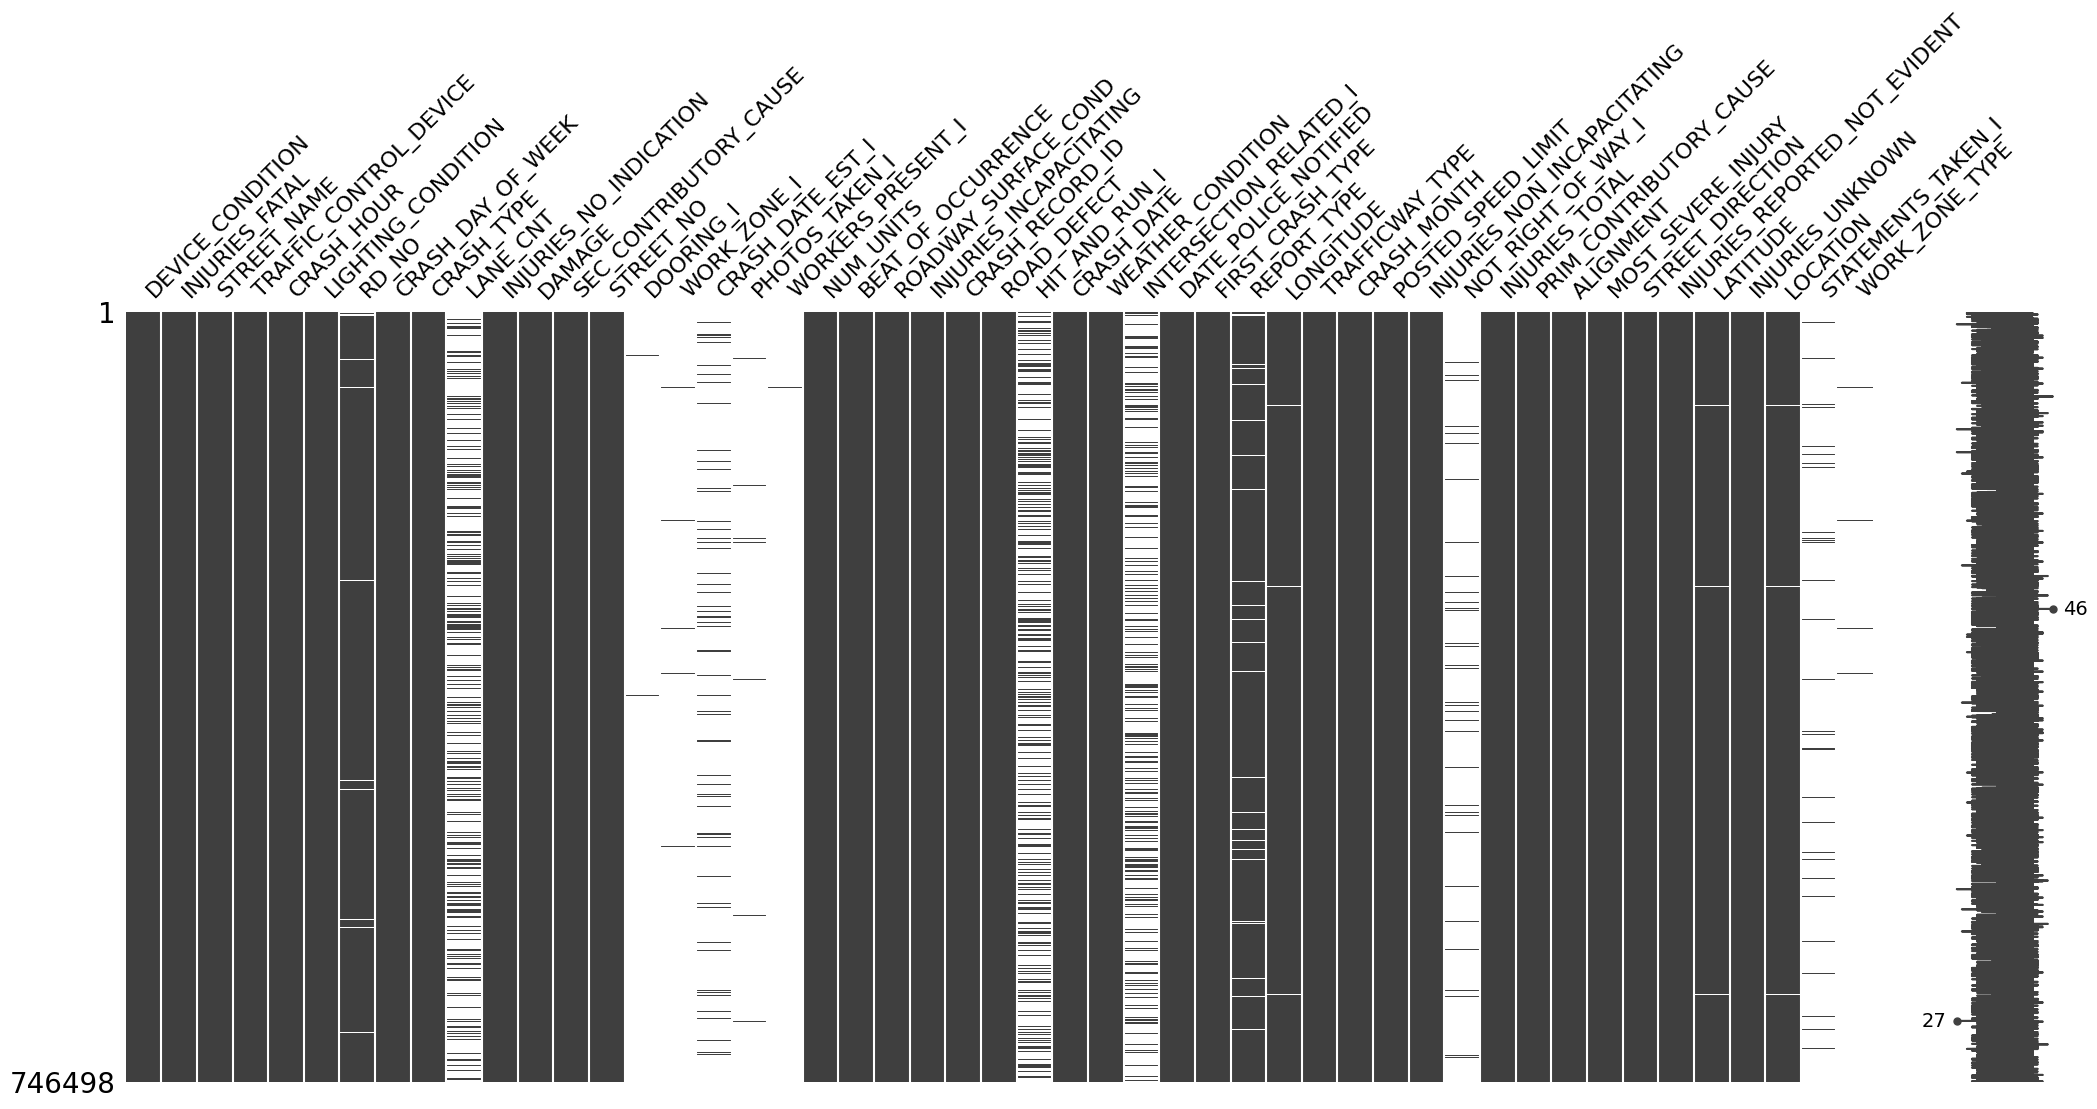

In [63]:
nan_graph_1=msno.matrix(df.sample(axis=1, n=49))

In [64]:
df.isnull().sum()

CRASH_RECORD_ID                       0
RD_NO                              4307
CRASH_DATE_EST_I                 690109
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         547494
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       21222
CRASH_TYPE                            0
INTERSECTION_RELATED_I           575368
NOT_RIGHT_OF_WAY_I               711724
HIT_AND_RUN_I                    513706
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [65]:
df["INJURIES_FATAL"].unique()

array([ 0., nan,  1.,  2.,  3.,  4.])

In [66]:
df["INJURIES_NON_INCAPACITATING"].unique()

array([ 0.,  1.,  2.,  4., nan,  3.,  7., 10.,  6.,  5.,  8., 14., 21.,
       12., 19., 18.,  9., 11., 15., 16.])

In [67]:
df["INJURIES_TOTAL"].unique()

array([ 0.,  1.,  3.,  2.,  4., nan,  6.,  7.,  5., 10., 12.,  9.,  8.,
       17., 11., 15., 21., 14., 19., 13., 16.])

In [68]:
# from ydata_profiling import ProfileReport
# slice_df = df.iloc[:, :10]
# report = ProfileReport(df, title='My Data', minimal=True)
# report.to_file("Crushes_in_Chicago.html")

We proceed to cut off the constant variable "INJURIES_UNKNOWN" with number of Zeros (%)	99.8%

In [69]:
df = df.drop(columns=['INJURIES_UNKNOWN'])

We proceed to cut off all the variables with 65% or more of missing values.

In [71]:
df = df.drop(columns=['CRASH_DATE_EST_I','LANE_CNT', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I','WORK_ZONE_TYPE', 'WORKERS_PRESENT_I'])

#### Model Selection

#### Data Pre-processing

#### Data Splitting

#### Training and Test

#### Interpretation